In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Code from https://www.tensorflow.org/tutorials/text/transformer
def get_angles(rows, cols):
    output_matrix = np.ones([rows,cols])
    for i in range(cols):
        output_matrix[:,i] = np.random.uniform(0,2*np.pi,rows)
    return output_matrix

def positional_encoding(position, d_model):
    angle_rads = get_angles(16,16)
  
  # apply sin to even indices in the array; 2i
    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])
  
  # apply cos to odd indices in the array; 2i+1
    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])
    
    pos_encoding = angle_rads
    
    return pos_encoding

def normalize_vector(input_vector):
    magnitude = np.linalg.norm(input_vector)
    return input_vector/magnitude

def gram_schmidt(input_matrix):
    cols = input_matrix.shape[1]
    rows = input_matrix.shape[0]
    output_matrix = np.ones([rows,cols])
    for i in range(cols):
        buffer_vector = input_matrix[:,i]
        for j in range(i):
            buffer_vector = buffer_vector - np.dot(input_matrix[:,i],output_matrix[:,j])*output_matrix[:,j]
        output_matrix[:,i] = normalize_vector(buffer_vector)     ##Normalize
    return output_matrix

In [3]:
tokens = 16
dimensions = 16

pos_encoding = positional_encoding(tokens, dimensions)
print (pos_encoding.shape)


(16, 16)


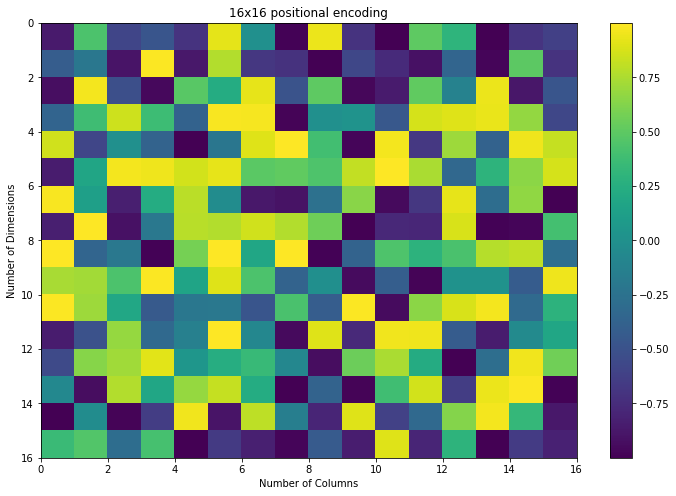

In [4]:
plt.figure(figsize=(12,8))
plt.pcolormesh(pos_encoding, cmap='viridis')
plt.title('16x16 positional encoding')
plt.xlabel('Number of Columns')
plt.xlim((0, dimensions))
plt.ylim((tokens,0))
plt.ylabel('Number of Dimensions')
plt.colorbar()
plt.show()

In [5]:
orthonormal_matrix = gram_schmidt(pos_encoding)
print(orthonormal_matrix.shape)

(16, 16)


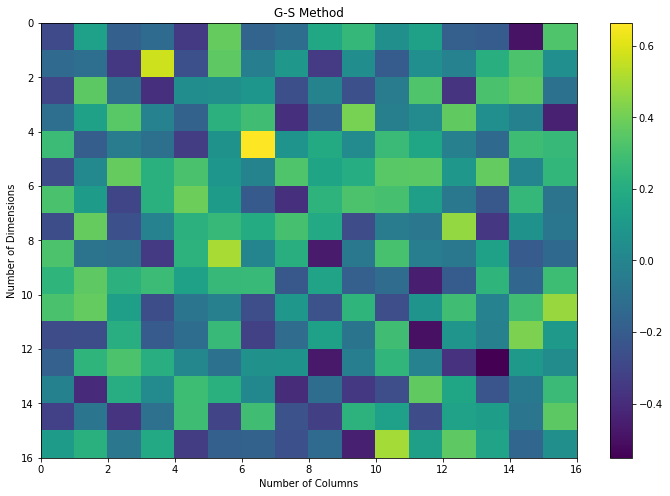

In [6]:
plt.figure(figsize=(12,8))
plt.pcolormesh(orthonormal_matrix, cmap='viridis')
plt.title('G-S Method')
plt.xlabel('Number of Columns')
plt.xlim((0, dimensions))
plt.ylim((tokens,0))
plt.ylabel('Number of Dimensions')
plt.colorbar()
plt.show()